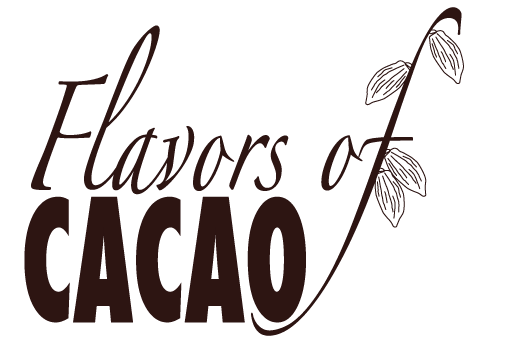

In [1]:
library("tidyverse")# Import necessary libraries

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


**Load the data**

In [2]:
data <- read.csv("C:\\Users\\ME\\Desktop\\Cacao\\flavors_of_cacao.csv")

In [3]:
data #look at what we are working with.

CompanyÂ...Maker.if.known.,Specific.Bean.Origin.or.Bar.Name,REF,Review.Date,Cocoa.Percent,Company.Location,Rating,Bean.Type,Broad.Bean.Origin
<fct>,<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<fct>,<fct>
A. Morin,Agua Grande,1876,2016,63%,France,3.75,Â,Sao Tome
A. Morin,Kpime,1676,2015,70%,France,2.75,Â,Togo
A. Morin,Atsane,1676,2015,70%,France,3.00,Â,Togo
A. Morin,Akata,1680,2015,70%,France,3.50,Â,Togo
A. Morin,Quilla,1704,2015,70%,France,3.50,Â,Peru
A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
A. Morin,Cuba,1315,2014,70%,France,3.50,Â,Cuba
A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela


In [4]:
dim(data) #Shape of the dataframe(No. of rows and columns dimension)

[1] 1795    9

In [5]:
names(data)#A look at the column variable

[1] "CompanyÂ...Maker.if.known."       "Specific.Bean.Origin.or.Bar.Name"
[3] "REF"                              "Review.Date"                     
[5] "Cocoa.Percent"                    "Company.Location"                
[7] "Rating"                           "Bean.Type"                       
[9] "Broad.Bean.Origin"

In [6]:
names(data) <- c("Company", "Specific_Origin", "Reference", "Year", "Cocoa_Percent","Location", "Rating", "Type", "Broad_Origin") #Rename the columns to be more readable.

In [7]:
str(data)#describe the dataset

'data.frame':	1795 obs. of  9 variables:
 $ Company        : Factor w/ 416 levels "A. Morin","Acalli",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Specific_Origin: Factor w/ 1039 levels "\"heirloom\", Arriba Nacional",..: 15 494 68 16 813 175 288 923 805 731 ...
 $ Reference      : int  1876 1676 1676 1680 1704 1315 1315 1315 1319 1319 ...
 $ Year           : int  2016 2015 2015 2015 2015 2014 2014 2014 2014 2014 ...
 $ Cocoa_Percent  : Factor w/ 45 levels "100%","42%","46%",..: 14 21 21 21 21 21 21 21 21 21 ...
 $ Location       : Factor w/ 60 levels "Amsterdam","Argentina",..: 19 19 19 19 19 19 19 19 19 19 ...
 $ Rating         : num  3.75 2.75 3 3.5 3.5 2.75 3.5 3.5 3.75 4 ...
 $ Type           : Factor w/ 42 levels "","Â ","Amazon",..: 2 2 2 2 2 10 2 10 10 2 ...
 $ Broad_Origin   : Factor w/ 101 levels "","Â ","Africa, Carribean, C. Am.",..: 70 80 80 80 57 93 18 93 93 57 ...


In [8]:
data = select (data,-c(Reference)) #Drop reference numbers since it has no unique predictive value. It just indicates how recently an entry was made in the database. 

In [9]:
str(data)#describe the dataset to check if reference was dropped.

'data.frame':	1795 obs. of  8 variables:
 $ Company        : Factor w/ 416 levels "A. Morin","Acalli",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Specific_Origin: Factor w/ 1039 levels "\"heirloom\", Arriba Nacional",..: 15 494 68 16 813 175 288 923 805 731 ...
 $ Year           : int  2016 2015 2015 2015 2015 2014 2014 2014 2014 2014 ...
 $ Cocoa_Percent  : Factor w/ 45 levels "100%","42%","46%",..: 14 21 21 21 21 21 21 21 21 21 ...
 $ Location       : Factor w/ 60 levels "Amsterdam","Argentina",..: 19 19 19 19 19 19 19 19 19 19 ...
 $ Rating         : num  3.75 2.75 3 3.5 3.5 2.75 3.5 3.5 3.75 4 ...
 $ Type           : Factor w/ 42 levels "","Â ","Amazon",..: 2 2 2 2 2 10 2 10 10 2 ...
 $ Broad_Origin   : Factor w/ 101 levels "","Â ","Africa, Carribean, C. Am.",..: 70 80 80 80 57 93 18 93 93 57 ...


In [10]:
data$Cocoa_Percent <-gsub("%", "", data$Cocoa_Percent) #Remove % sign from cocoa_percent variable

In [11]:
head(data) #Check the % sign was removed

Company,Specific_Origin,Year,Cocoa_Percent,Location,Rating,Type,Broad_Origin
<fct>,<fct>,<int>,<chr>,<fct>,<dbl>,<fct>,<fct>
A. Morin,Agua Grande,2016,63,France,3.75,Â,Sao Tome
A. Morin,Kpime,2015,70,France,2.75,Â,Togo
A. Morin,Atsane,2015,70,France,3.00,Â,Togo
A. Morin,Akata,2015,70,France,3.50,Â,Togo
A. Morin,Quilla,2015,70,France,3.50,Â,Peru
A. Morin,Carenero,2014,70,France,2.75,Criollo,Venezuela


In [12]:
data$Cocoa_Percent <- as.numeric(as.character(data$Cocoa_Percent)) #Convert from character to numeric data type 
data$Rating <- as.numeric(as.character(data$Rating))#Convert from character to numeric data type 

In [13]:
head(data)

Company,Specific_Origin,Year,Cocoa_Percent,Location,Rating,Type,Broad_Origin
<fct>,<fct>,<int>,<dbl>,<fct>,<dbl>,<fct>,<fct>
A. Morin,Agua Grande,2016,63,France,3.75,Â,Sao Tome
A. Morin,Kpime,2015,70,France,2.75,Â,Togo
A. Morin,Atsane,2015,70,France,3.00,Â,Togo
A. Morin,Akata,2015,70,France,3.50,Â,Togo
A. Morin,Quilla,2015,70,France,3.50,Â,Peru
A. Morin,Carenero,2014,70,France,2.75,Criollo,Venezuela


In [14]:
data$Broad_Origin[data$Broad_Origin == 'Domincan Republic'] <- 'Dominican Republic'

In [15]:
summary(data)#describe the summary stats for the dataset

     Company               Specific_Origin      Year      Cocoa_Percent  
 Soma    :  47   Madagascar        :  57   Min.   :2006   Min.   : 42.0  
 Bonnat  :  27   Peru              :  45   1st Qu.:2010   1st Qu.: 70.0  
 Fresco  :  26   Ecuador           :  42   Median :2013   Median : 70.0  
 Pralus  :  25   Dominican Republic:  37   Mean   :2012   Mean   : 71.7  
 A. Morin:  23   Venezuela         :  21   3rd Qu.:2015   3rd Qu.: 75.0  
 Arete   :  22   Chuao             :  19   Max.   :2017   Max.   :100.0  
 (Other) :1625   (Other)           :1574                                 
    Location       Rating                        Type    
 U.S.A. :764   Min.   :1.000   Â                   :887  
 France :156   1st Qu.:2.875   Trinitario          :419  
 Canada :125   Median :3.250   Criollo             :153  
 U.K.   : 96   Mean   :3.186   Forastero           : 87  
 Italy  : 63   3rd Qu.:3.500   Forastero (Nacional): 52  
 Ecuador: 54   Max.   :5.000   Blend               : 41  
 (

**Rating**

In [16]:
# Compute the rating frequency
library(dplyr)
df <- data %>%
  group_by(Rating) %>%
  summarise(counts = n())
df

Rating,counts
<dbl>,<int>
1.00,4
1.50,10
1.75,3
2.00,32
2.25,14
2.50,127
2.75,259
3.00,341
3.25,303


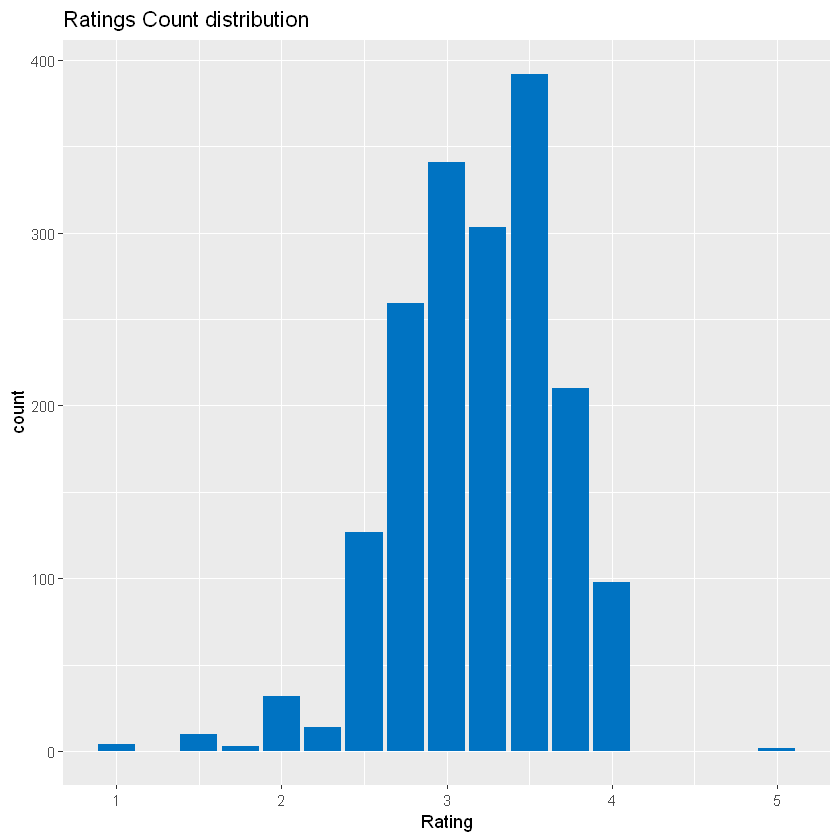

In [17]:
ggplot(data, aes(Rating))+
    geom_bar(fill = "#0073C2FF")+
    labs(title="Ratings Count distribution")

In [18]:
data %>% filter((Rating == 5)|(Rating == 1))#Which countries produce the highest-rated bars

Company,Specific_Origin,Year,Cocoa_Percent,Location,Rating,Type,Broad_Origin
<fct>,<fct>,<int>,<dbl>,<fct>,<dbl>,<fct>,<fct>
Amedei,Chuao,2007,70,Italy,5,Trinitario,Venezuela
Amedei,Toscano Black,2006,70,Italy,5,Blend,Â
Callebaut,Baking,2007,70,Belgium,1,Â,Ecuador
Claudio Corallo,Principe,2008,100,Sao Tome,1,Forastero,Sao Tome & Principe
Cote d' Or (Kraft),Sensations Intense,2006,70,Belgium,1,Â,Â
Neuhaus (Callebaut),Dark,2007,73,Belgium,1,Â,Â


In [19]:
summary(data$Rating)
sd(data$Rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.875   3.250   3.186   3.500   5.000 

[1] 0.4780624

+ *Rating is normally distributed with a mean of 3.2 thus most chocolates are deemed by the dataset description to be satisfactory*
+ *Notice there are outliers rated at 1(4 bars) and 5(2 bars)*
+ *Amedei in Italy has the highest ratings both at 5. While lowest rated mostly are from Belgium.*
+ *A standard deviation of 0.5 captures a narrow range (2.70 and 3.70) between the min (1.0) and max (5.0) where ratings are closely clustered to the average.*
+ *With median being higher than mean this might mean the raters are more likely to give out a low rating than a higher one*

**Cocoa Percentage**

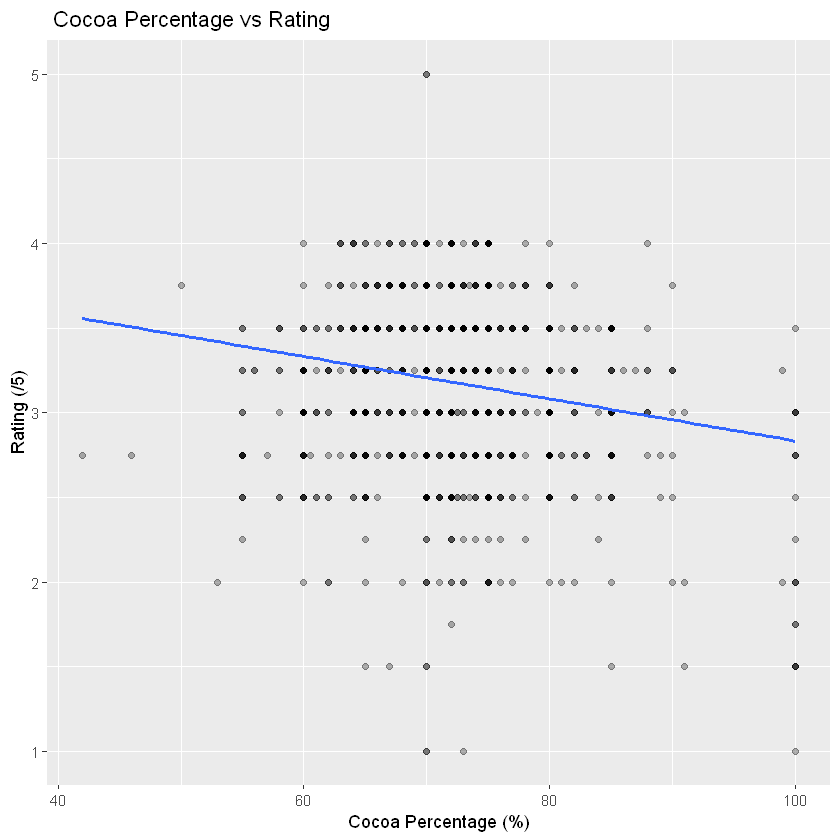

In [20]:
ggplot(data, aes(Cocoa_Percent, Rating))+
    geom_point(alpha =0.3)+
    geom_smooth(se=FALSE, method = "lm")+
    labs(title=" Cocoa Percentage vs Rating", x="Cocoa Percentage (%)", y="Rating (/5)")#Cocoa percentage versus Ratings

+ *As `cocoa_percent` increases the `rating` goes down.A higher cocoa percentage reflects to a lower rating.*
+ *Most chocolate bars have a cocoa percentage of around 70%*

**Company**

In [21]:
data %>% group_by(Company) %>% summarise(Count= n())%>%
  top_n(10, wt = Count)%>%arrange(desc(Count))

Company,Count
<fct>,<int>
Soma,47
Bonnat,27
Fresco,26
Pralus,25
A. Morin,23
Arete,22
Domori,22
Guittard,22
Valrhona,21


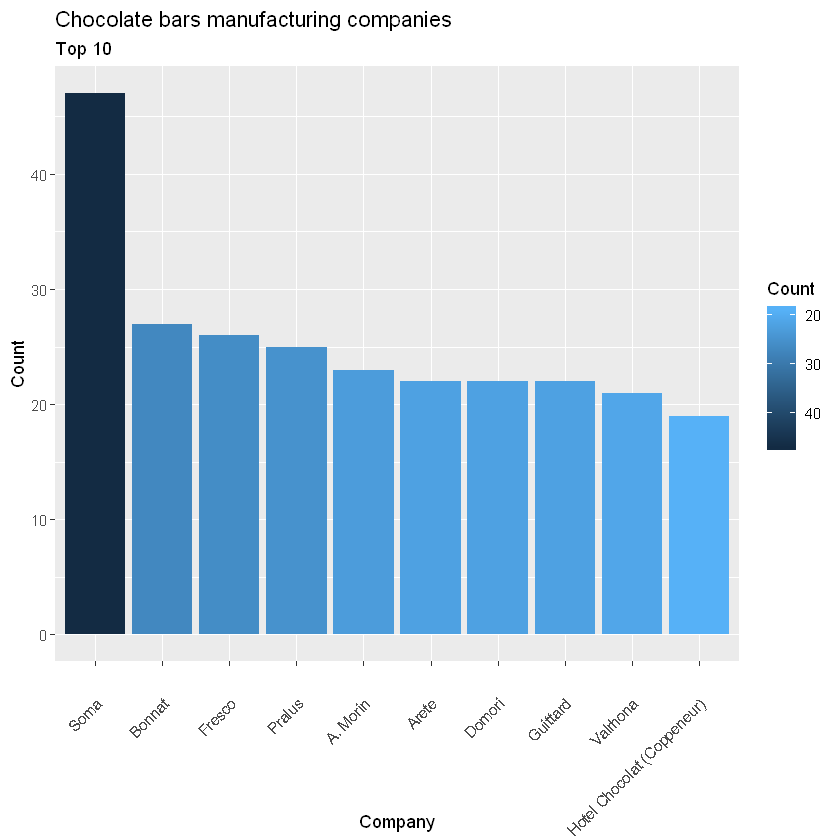

In [22]:
data %>% group_by(Company) %>% summarise(Count= n())%>%
  top_n(10, wt = Count)%>%arrange(desc(Count))%>%
ggplot(aes(reorder(Company, -Count),  Count, fill = Count)) + 
  geom_bar(stat = "identity") +scale_fill_continuous(trans = 'reverse')+xlab("Company") +ylab("Count")+
  labs(title="Chocolate bars manufacturing companies", subtitle = "Top 10")+
  theme(axis.text.x = element_text(angle = 45, vjust = 0.8, hjust=1))

+ *The top 10 chocolate making companies in the dataset are Soma, Bonnat, Fresco, Pralus, A. Morin, Arete, Domori, Guittard,Valrhona and Hotel chocolat(coppeneur).*

**Year**

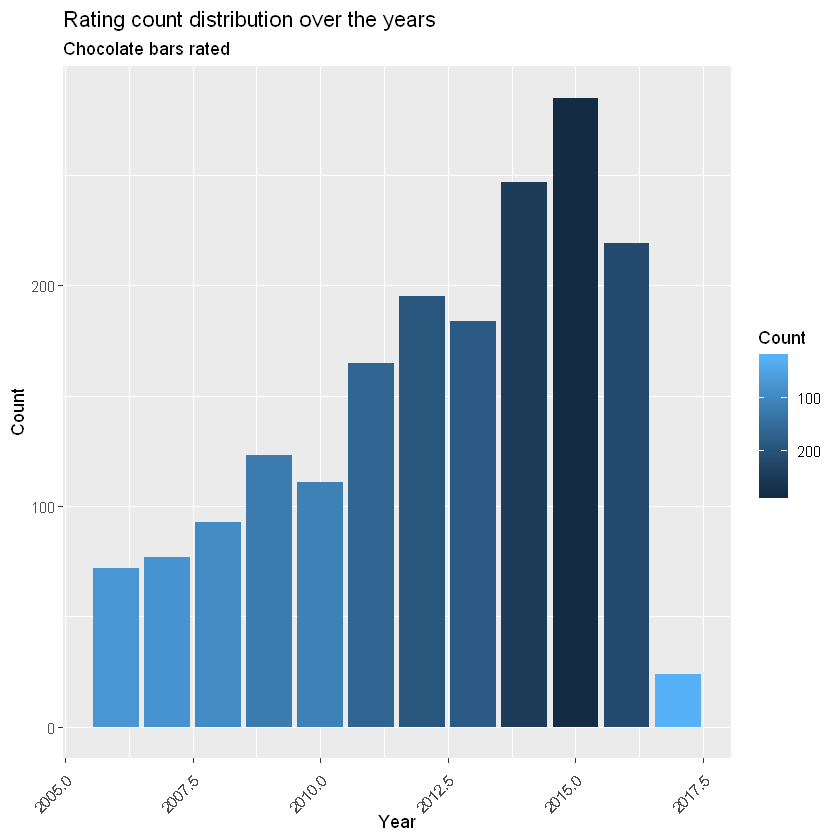

In [23]:
data %>% group_by(Year) %>% summarise(Count= n())%>%
  ggplot(aes(x =Year, y = Count, fill = Count)) + geom_bar(stat = "identity") + 
  scale_fill_continuous(trans = 'reverse')+
  labs(title="Rating count distribution over the years", subtitle = "Chocolate bars rated")+
  theme(axis.text.x = element_text(angle = 45, vjust = 0.8, hjust=1)) #Rating Year

+ *From 2006, when around 70 chocolate bars were rated, there was a yearly steady rating count increase until its highest at around 280 in 2015 then decreased significantly to less than 50 ratings.* 

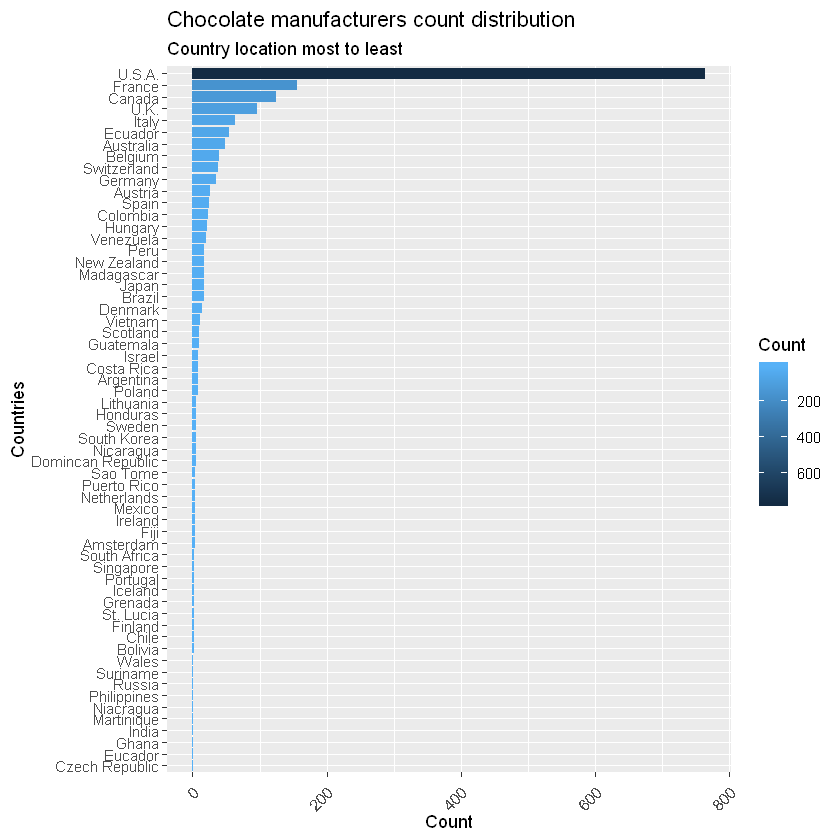

In [24]:
data %>% group_by(Location) %>% summarise(Count= n())%>% 
    ggplot(aes(x =reorder(Location,Count), y =Count, fill = Count)) + geom_bar(stat = "identity") + 
    scale_fill_continuous(trans = 'reverse')+coord_flip()+xlab("Countries") +ylab("Count")+
    labs(title="Chocolate manufacturers count distribution", subtitle = "Country location most to least")+
    theme(axis.text.x = element_text(angle = 45, vjust = 0.8, hjust=1))

+ *The chocolate making companies are highest in USA with around 750*

**Type**

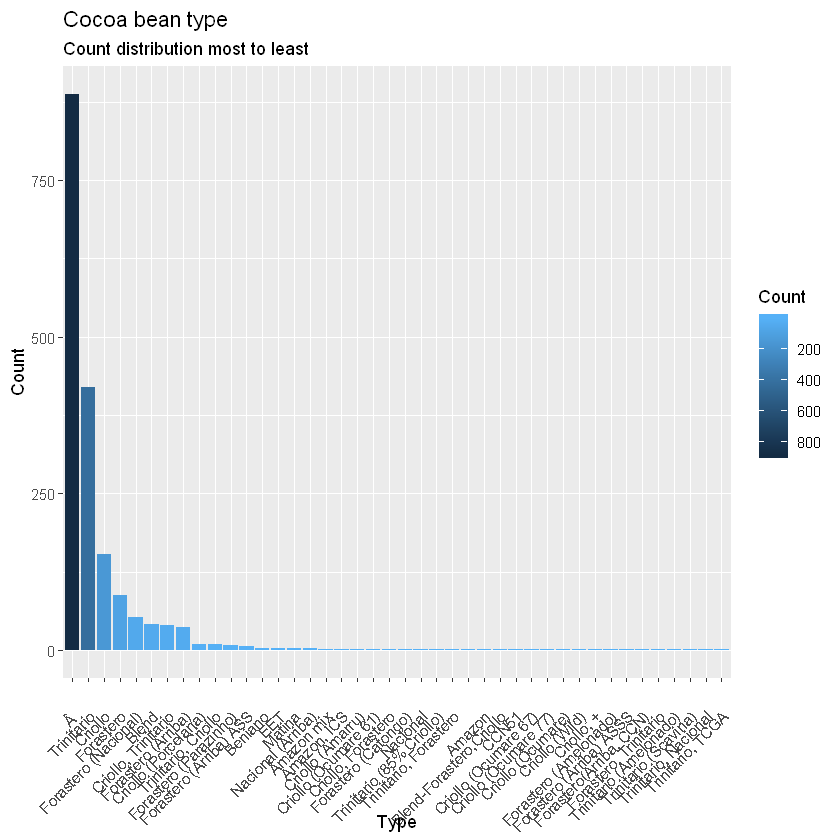

In [25]:
data %>% group_by(Type) %>% summarise(Count= n())%>%
   ggplot(aes(x =reorder(Type,-Count), y =Count, fill = Count)) + geom_bar(stat = "identity") + 
   scale_fill_continuous(trans = 'reverse')+xlab("Type") +ylab("Count")+
   labs(title="Cocoa bean type", subtitle = "Count distribution most to least")+
   theme(axis.text.x = element_text(angle = 45, vjust = 0.8, hjust=1))

+ *From the specified type, chocolates made exclusively with the Trinitario variety are the most common. It accounts for at least double that of Criollo and Forastero.*

**Bean Origin**

In [26]:
data %>% group_by(Broad_Origin) %>% summarise(Count= n())%>% mutate(pct=Count/sum(Count)) %>%
top_n(10, wt = Count)%>%arrange(desc(Count))

Broad_Origin,Count,pct
<fct>,<int>,<dbl>
Venezuela,214,0.11922006
Ecuador,193,0.10752089
Dominican Republic,166,0.09247911
Peru,165,0.09192201
Madagascar,145,0.08077994
Â,73,0.04066852
Nicaragua,60,0.03342618
Brazil,58,0.03231198
Bolivia,57,0.03175487


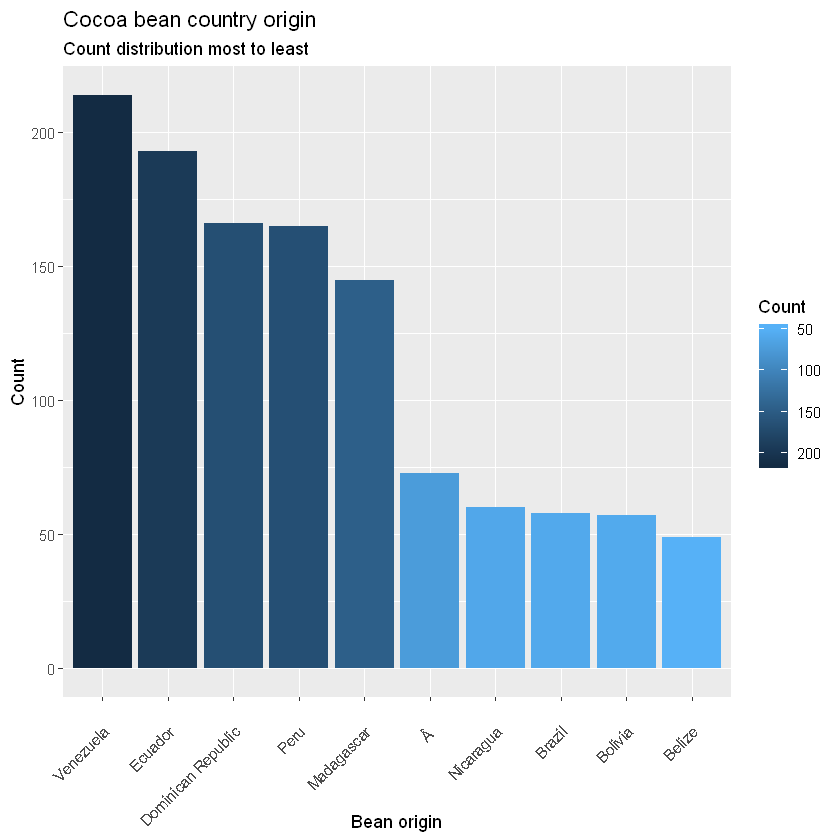

In [27]:
data %>% group_by(Broad_Origin) %>% summarise(Count= n())%>%
    top_n(10, wt = Count)%>%arrange(desc(Count))%>%
ggplot(aes(x =reorder(Broad_Origin,-Count), y =Count, fill = Count)) + geom_bar(stat = "identity") + 
   scale_fill_continuous(trans = 'reverse')+xlab("Bean origin") +ylab("Count")+
   labs(title="Cocoa bean country origin ", subtitle = "Count distribution most to least")+
   theme(axis.text.x = element_text(angle = 45, vjust = 0.8, hjust=1))

+ *The leading bean origin countries are mostly from South America with Venezuela, Ecuador, Dominican Republic and Peru taking lead.*
+ *Venezuela is the only bean origin country with a 5 rating bar.*

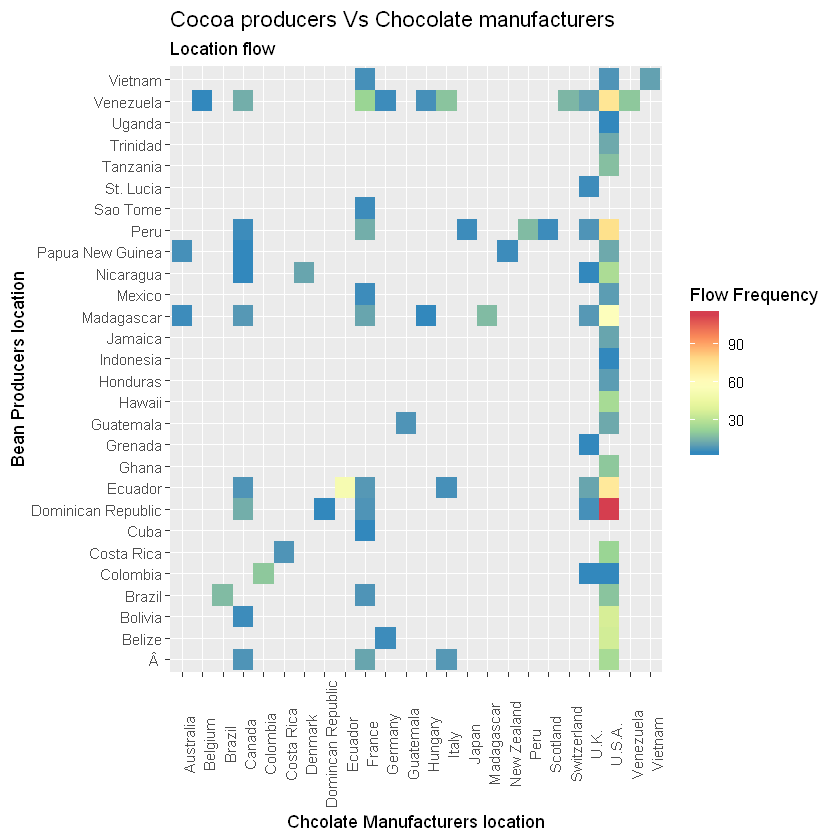

In [28]:
data %>% group_by(Location,Broad_Origin) %>% count() %>% filter(n>=5) %>%
  ggplot(aes(x = Location, y = Broad_Origin,fill=n))+geom_tile()+scale_fill_distiller(palette = "Spectral")+
  labs(title="Cocoa producers Vs Chocolate manufacturers", subtitle = "Location flow",fill="Flow Frequency")+
  xlab("Chcolate Manufacturers location") +ylab("Bean Producers location")+
  theme(axis.text.x = element_text(angle = 90))

+ *With the exception of Ecuador most of the top chocolate making countries seem not to be also cocoa producers*

*Time Series*

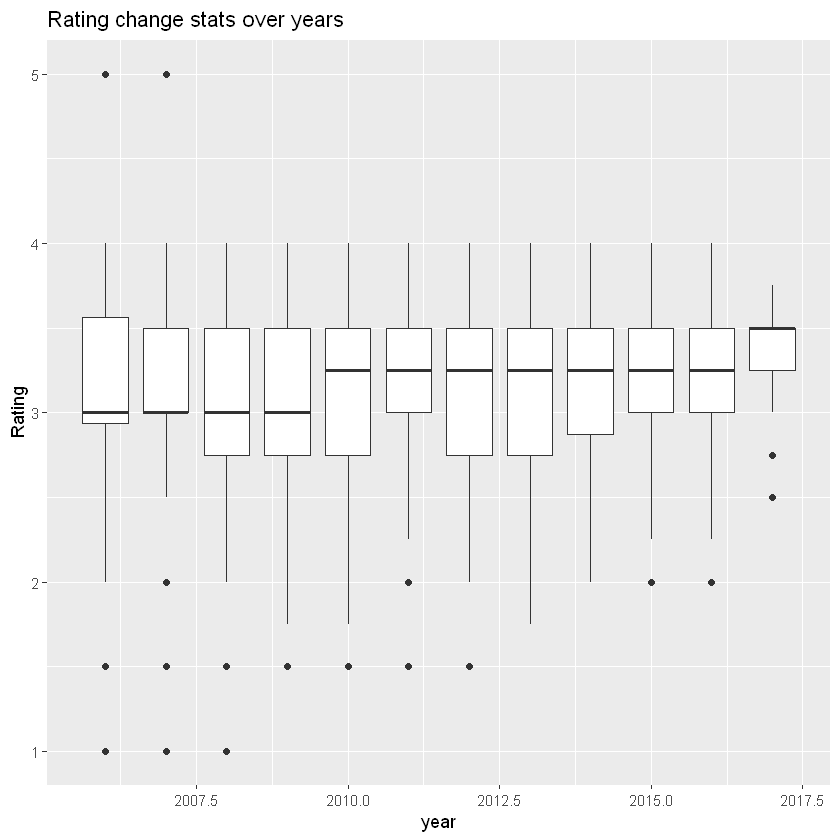

In [29]:
data %>% group_by(Year) %>% ggplot(aes(x=Year,y=Rating, group = Year))+
  geom_boxplot()+theme(legend.position = "none")+labs(x="year",title="Rating change stats over years")

+ *Average ratings over the year scored between 3 and 3.5 and with steady increase over time*

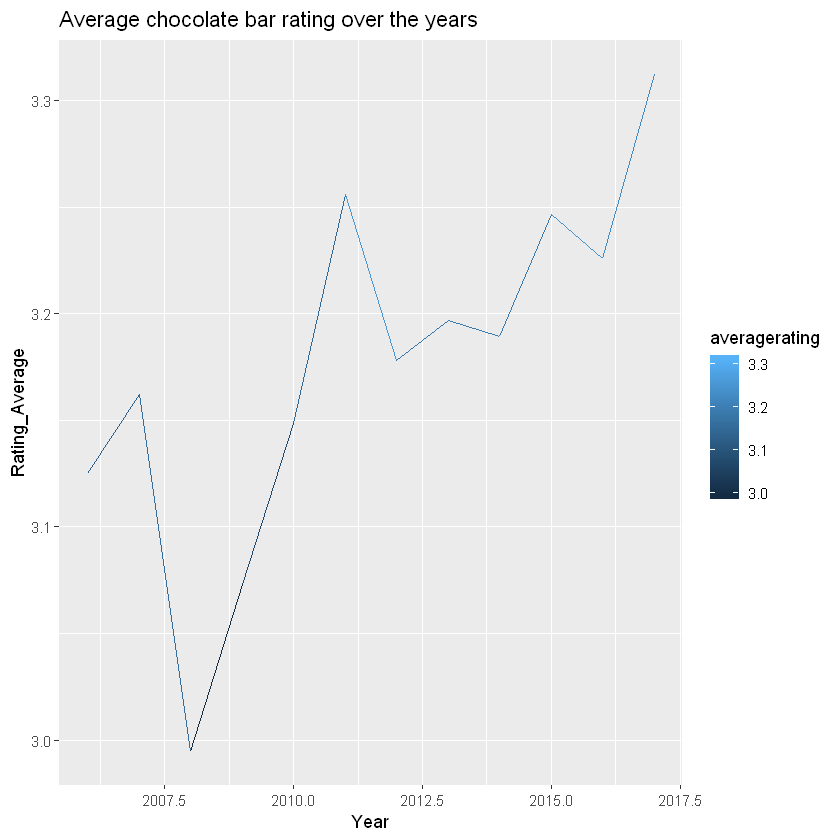

In [30]:
data %>%
 group_by(Year) %>%
  summarise(averagerating=mean(Rating),sdrating=sd(Rating))%>%
ggplot(aes(x=Year,y=averagerating,color=averagerating))+
    geom_line()+xlab("Year") +ylab("Rating_Average")+labs(title="Average chocolate bar rating over the years")

+ *The lowest average rating is around 3 in 2008.* 
+ *There was a steep increase in rating to 3.26 in 2011 .* 
+ *There after there were several fluctuations upto where rating was at its highest in 2017 with 3.31.*

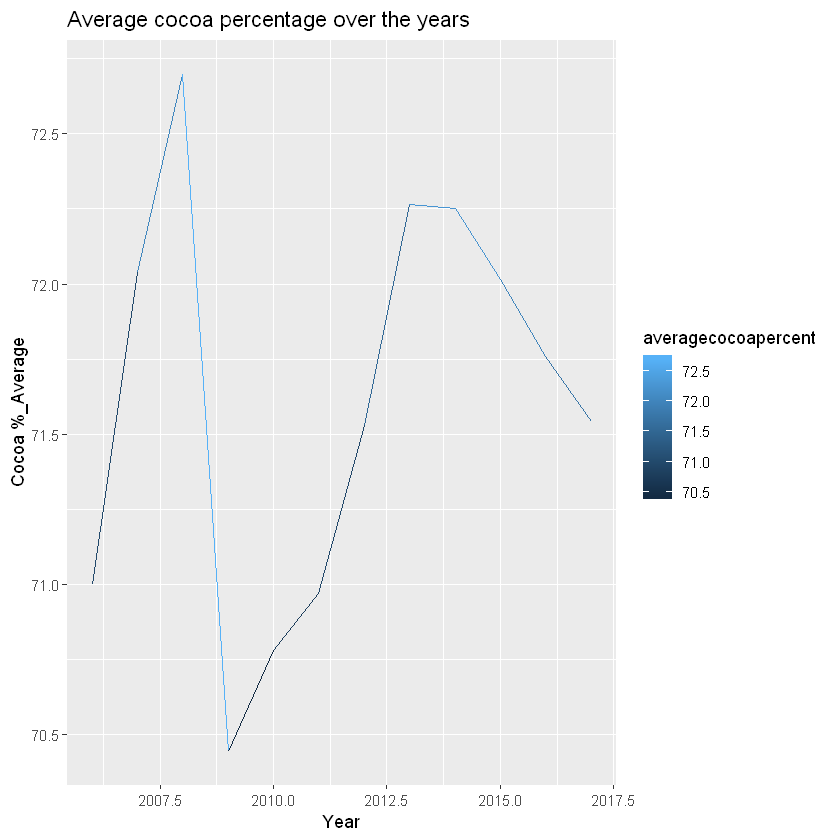

In [31]:
data %>%
 group_by(Year) %>%
  summarise(averagecocoapercent=mean(Cocoa_Percent),sdcocoapercent=sd(Cocoa_Percent))%>%
ggplot(aes(x=Year,y=averagecocoapercent,color=averagecocoapercent))+
    geom_line()+xlab("Year") +ylab("Cocoa %_Average")+labs(title="Average cocoa percentage over the years")

+ *The highest percentage of cocoa was around 2008 at 73%.* 
+ *The lowest percentage of cocoa was around 2009 at 69%. A steep decrease.* 
+ *Between 2009 and 2013 there was a steep rise of cocoa pecentage from 69% to 72.25%.*
+ *A Steady decrease after that to 71.5% in 2017.*